## Defining the Question

### a) Specifying the Question

The research problem is to find out how we can predict the individuals who are most likely to have or use a bank account.

Additionally, we would like to provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda.

Lastly we would like to provide insights into some of the key demographic factors that might drive individuals’ financial outcomes

### b) Defining the Metric for Success

For this analysis to be considered successful, the following areas must be covered:
1. Overall Exploratory Data Analysis. 
2. Univariate Analysis. 
3. Bivariate Analysis.
4. Multivariate Analysis.
5. Use Appropriate Visualizations.
6. 

### c) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

The following steps will be followed in conducting this study:
1. Defining the Question 
2. Reading the Data.
3. Checking the Data.
4. Performing Univariate, Bivariate and Multivariate Analysis.
5. Creating Visualizations.
6. Challenging teh Solution.
4. Conclusions and Recommendations. 

### e) Data Relevance

The data provided aligns with the context of our study. This data was extracted from various Finscope surveys ranging from 2016 to 2018 conducted in Kenya, Tanzania, Rwanda and Uganda.

The dataset can be found here http://bit.ly/FinancialDataset and the variable definitions ofthe dataset can be found here http://bit.ly/VariableDefinitions 

The dataset contains crucial information from respondents on whether they have a bank account or not. Additionally, we have more information regarding the respondents, including their country, age, whether they have access to a cellphone or not,their location of residence, their household size, marital status, eductaion level and the type of job they have. 

All this information will help us analyze if these factors determine whether an individual has a bank account or not.

## Reading the Data

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

In [ ]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading our Dataset

In [ ]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/FinancialDataset

df = pd.read_csv('http://bit.ly/FinancialDataset')

### Previewing the Dataset 

In [ ]:
# previewing the first five entries of the dataset

df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# previewing the last five entries of the dataset

df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


## Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# checking the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Checking the entire profile of the dataframe

profile = ProfileReport(df, title="Financial Dataset Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us save our profile report
profile.to_file(output_file="Financial_Dataset_Profile_Report.html") 

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 4. Tidying the Dataset

In [ ]:
# let us check for any duplicated data in our dataframe
df.duplicated().sum()

0

In [ ]:
# Dropping columns we will not need for this analysis
# 
df = df.drop(['uniqueid', 'The relathip with head'], axis = 1)
df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [ ]:
# Fixing Messy Column Names
df.columns
df.rename(columns={'level_of_educuation':'level_of_education', 
                   'type_of_location':'location_type','respondent_age':'age',
                   'gender_of_respondent':'gender',
                   'level_of_educuation':'education_level',}, inplace=True)

In [ ]:
# Removing the spaces and setting all column names to lower case

df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [ ]:
# From our profile report we can see that we have null values 
# Let us juct check for a summary of these missing values
df.isnull().sum()

country                14
year                    0
has_a_bank_account     36
type_of_location       15
cell_phone_access      11
household_size         28
respondent_age         34
gender                 34
marital_status         32
level_of_educuation    29
type_of_job            30
dtype: int64

In [ ]:
# dealing with missing data
# let us drop these missing values  
df.dropna(inplace = True)

In [ ]:
# now let us confirm that our data has no missing data
df.isnull().sum()

country                0
year                   0
has_a_bank_account     0
type_of_location       0
cell_phone_access      0
household_size         0
respondent_age         0
gender                 0
marital_status         0
level_of_educuation    0
type_of_job            0
dtype: int64

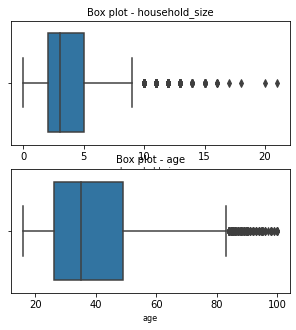

In [ ]:
# Checking for Anomalies
# 
# Checking for outliers in the columns with numerical data
col_names = ['household_size','age']

fig, ax = plt.subplots(len(col_names), figsize=(5,5))

for i, col_val in enumerate(col_names):
    sns.boxplot(df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [ ]:
# Checking for Anomalies
# from the profile report, there is a problem with our year column
# let us check the unique values of our year column
df.year.unique()

# we need to fix this anomaly by removing the misentered years 
# i.e. 2029,2056 and 2039

anomalies = df[df['year']>2018].index
df.drop(anomalies, inplace=True)

# Let us check if we have eliminated the anomlaies
df.year.unique()

array([2018, 2016, 2017])

In [ ]:
# now that we have a clean dataset, let us carry out our analysis

# Exploratory Data Analysis

#  Univariate Analysis

### We will use Univariate analysis to understand the data in our dataframe 

In [ ]:
# Generating a frequency table of the number of people with a bank account
# 
pd.crosstab(index=df.has_a_bank_account, columns='count',)

# from the output below, we can see that most respondents have a bank account

col_0,count
has_a_bank_account,
No,20044
Yes,3296


In [ ]:
# Generating a frequency table of type of location and their value counts
# 
pd.crosstab(index=df.location_type, columns='count',)

# from the output below, we can see that most respondents reside in rural areas

col_0,count
location_type,
Rural,14263
Urban,9077


In [ ]:
# Generating a frequency table of type of cell phone access and their value counts
# 
pd.crosstab(index=df.cell_phone_access, columns='count',)

# from the output below, we can see that most respondents have access to a cellphone


col_0,count
cell_phone_access,
No,6009
Yes,17331


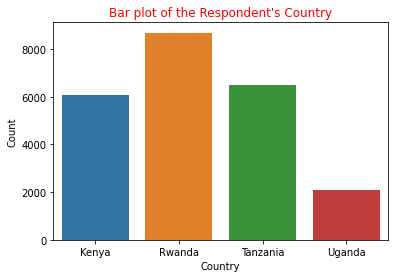

In [ ]:
# Plotting a bar plot of the respondent country

# we use seaborn to create a bar chart
sns.countplot(x='country', data=df)

# Labelling our x axis
plt.xlabel("Country")

# Labelling our y axis
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Bar plot of the Respondent's Country", color='red')

# Displaying our chart
plt.show()

# From the graph displayed, we can see that the number of respondents varied
# from country to country, 
# with Rwanda having the majority number while Uganda had the least number of 

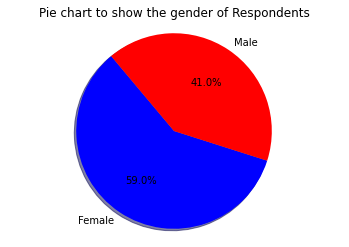

In [ ]:
# plotting a pie chart to show the gender of Respondents
gender = df.groupby(['gender']).count().reset_index()

colors = ['blue', 'red']
g = gender['gender']
age=gender['age']

# plotting the pie chart
plt.pie(age, labels=g, colors=colors, autopct='%1.1f%%', shadow=True, startangle=130)
#plt.pie(fare,explode= explode1, labels=labels1, colors=colors1, autopct='%1.1f%%', shadow=True, startangle=130)

plt.title('Pie chart to show the gender of Respondents')
plt.axis('equal')
plt.show()

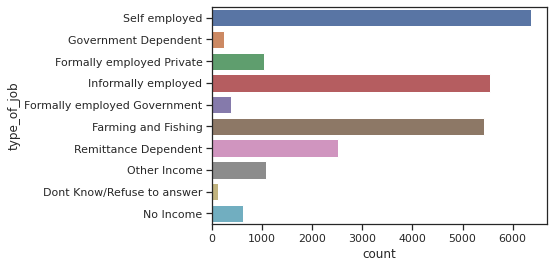

In [ ]:
# Plotting a bar plot of the respondent job type

# we use seaborn to create a bar chart
sns.countplot(y='type_of_job', data=df)

# majority of the respondents are self employed and informally employed or
# are farmers or fishermen.

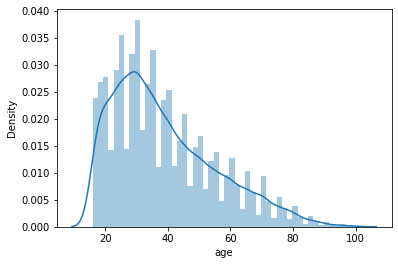

In [ ]:
# let us now create a histogram to to show the distribution of respondent's age

sns.distplot(df['age'], kde=True)

# the histogram shows us that the age distribution is skewed to the right
# meaning that the mean is greater than the mode 

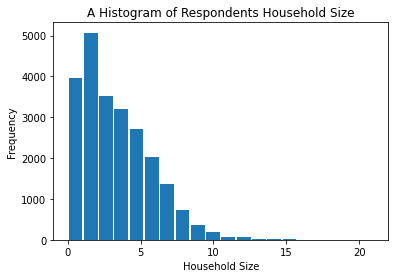

In [ ]:
# let us now create a histogram to to show the distribution of respondent's age

house = df['household_size']
plt.hist(house, bins=20, histtype='bar', rwidth=0.9)
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.title('A Histogram of Respondents Household Size')
plt.show()

# the histogram shows us that the age distribution is skewed to the right
# meaning that the mean is greater than the mode 

In [ ]:
# let us use the measures of central tendency to prove the skewness of the
# histogram above  of age
# if the mean of the age column is greater than the mode
# Finding the mean
print('The mean of age column is', df["age"].mean())

# finding the mode
print('The mode of age column is', df["age"].mode())

# from the output the mean is greater than the mode

The mean of age column is 38.80706940874036
The mode of age column is 0    30.0
dtype: float64


In [ ]:
# let us use the measures of central tendency to prove the skewness of the
# histogram above  of household sizes
# if the mean of the age column is greater than the mode
# Finding the mean
print('The mean of age column is', df["household_size"].mean())

# finding the mode
print('The mode of age column is', df["household_size"].mode())

# from the output the mean is greater than the mode

The mean of age column is 3.688560411311054
The mode of age column is 0    2.0
dtype: float64


In [ ]:
# Determining the kurtosis of age
df["age"].kurt()
# The kurtosis of age is close to 0, meaning that it is a platykurtic distribution.
# Meaning fewer values in the distribtion are close to the mean

0.09826807013177241

In [ ]:
# Determining the kurtosis of household size
df["household_size"].kurt()
# the kurtosis is greater than zero, meaning that it is a leptokurtic distribution.
# Menaing that more values in the distribution are close to the mean

1.1538357462528523

# Bivariate  And Multivariate Analysis

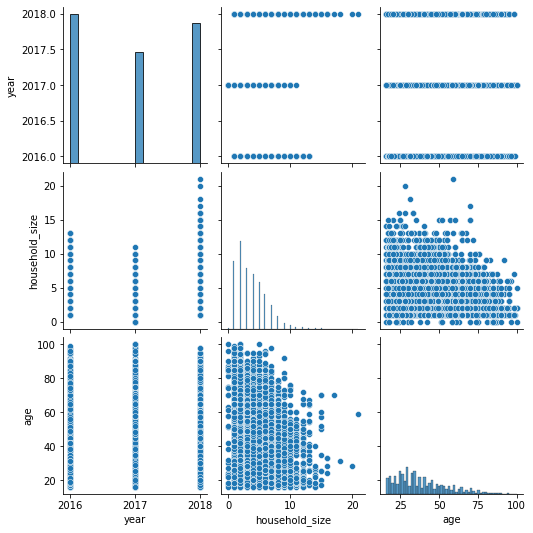

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

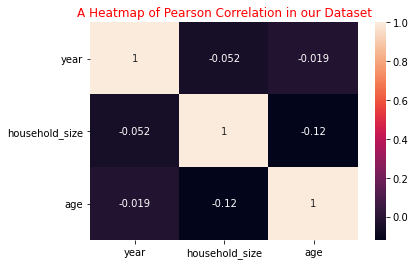

In [ ]:
# Calculating the pearson coefficient
a = df.corr() 
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns,annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

# there is a weak negative correlation among all the variables 

### People with Bank Account Analysis

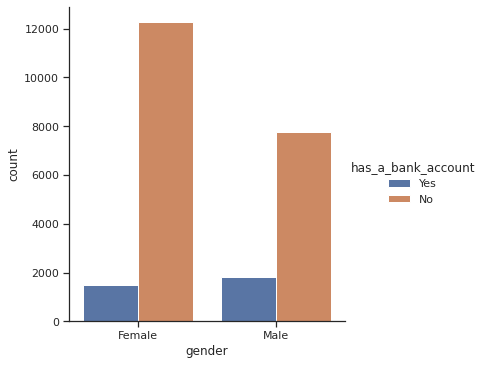

In [ ]:
# graphical representation of the variables relationship to whether a respondent has a bank account or not
# Make the figure space

# gender
sns.catplot( x='gender', kind="count", hue="has_a_bank_account", data=df)

# there is a slight difference in gender with regards to having abank account
# men are more likely to have a bank account


(array([    0.,  2500.,  5000.,  7500., 10000.]),
 <a list of 5 Text major ticklabel objects>)

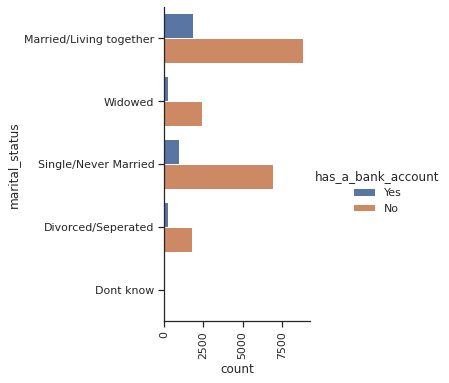

In [ ]:
# marital status
sns.catplot( y='marital_status', kind="count", hue="has_a_bank_account", data=df)

# people who are married or living with their spouses are more likely to have a bank account

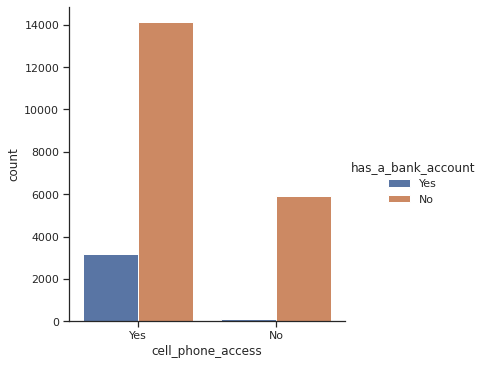

In [ ]:
#cell phone access
sns.catplot( x='cell_phone_access', kind="count", hue="has_a_bank_account", data=df)

# people with access to a cellphone seem to have a bank account.

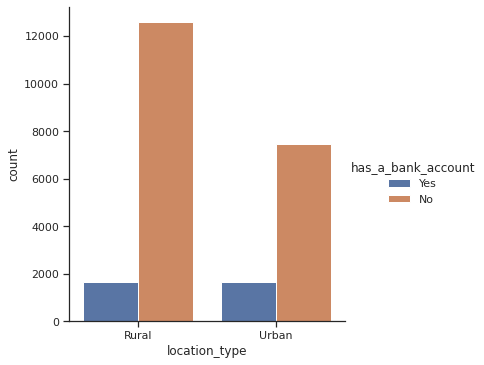

In [ ]:
#type of Location 
sns.catplot( x='location_type', kind="count", hue="has_a_bank_account", data=df)

# there doesn not see to be a significant difference between those who live in 
# Rural areas and in Urban. therefore this is not a factor that can be used to 
#predict if an individual has or is likely to use a bank account


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

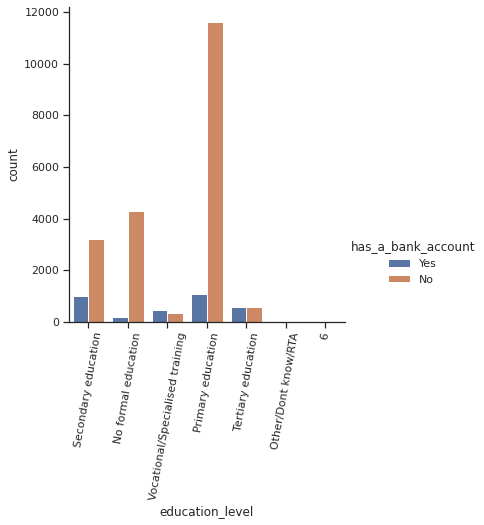

In [ ]:
#Education level
sns.catplot( x='education_level', kind="count", hue="has_a_bank_account", data=df)
plt.xticks(rotation = 80)

# individua;s with some form of higher education are more likely to have a bank account

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

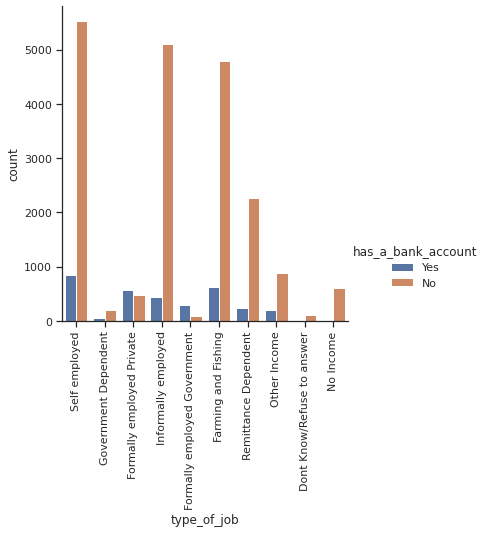

In [ ]:
#type of job
sns.catplot( x='type_of_job', kind="count", hue="has_a_bank_account", data=df)
plt.xticks(rotation = 90)

# individuals with some source of income are more likely to have a bank account

# Reduction Techniques

Now we have several variables, in order to visualize patterns much better we can reduce our variables into 2 or 3 significant ones without losing the essence of the data collected.

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

PCA is a statistical technique and can only be applied to numeric data. Therefore, categorical features are required to be converted into numerical features before PCA can be applied.

In [ ]:
# The first preprocessing step is to divide the dataset into;
# a feature set: X, here we will drop all non-numerical data
# and corresponding label: Y

X = df.drop(columns = ['country','has_a_bank_account','location_type',
                       'cell_phone_access',	'household_size',	
                       'age',	'gender','marital_status',	
                       'education_level' ,	'type_of_job'], axis = 1)
y = df['has_a_bank_account']

In [ ]:
# Step 2: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Step 3: Normalization
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Step 4: Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.])

In [ ]:
# Step 6: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Step 7: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 4036 out of 4668 instances, 
# resulting in 86.46% accuracy.

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


## Follow up questions

### a). Did we have the right data?

Yes we had the right data.
The dataset contains crucial information from respondents on whether they have a bank account or not. Additionally, we have more information regarding the respondents, including their country, age, whether they have access to a cellphone or not,their location of residence, their household size, marital status, eductaion level and the type of job they have. 

All this information assisted us in analysis of these factors determining whether an individual has a bank account or not.

### b). Do we need other data to answer our question?

We would probably need additional information detailing reasons why individuals do not have a bank account. This would help the financial institutions address these issues specifically allowing this individuals to open bank accounts. 

### c). Did we have the right question?

The question should have been visualizing financial data across East Africa with regards to who has a bank account and who doesn't instead of predicting the individuals who are most likely to have or use a bank account.

# Conclusion

From the bivariate and multivariate analysis we can use the following factors to predict whether an individual is likely to have or use a bank account:

1. Education Level
2. Marital Status
3. Type of Job
4. Access to a Cell phone